--------------------Implementing Clustering Algorithms--------------------

--------------------Question Four--------------------
--------------------Running the k-means clustering algorithm--------------------

Assigning cluster representative to word using Kmean Algorithm for K=3
   closest      label
0        2   elephant
1        2    leopard
2        2        dog
3        2        cat
4        2   aligator
5        2        ant
6        2     baboon
7        2       bear
8        2        bat
9        2  butterfly

--------------------Varying the value of k from 2 to 9 and computing the Silhouette coefficient--------------------

Varying the value of k from 2 to 9 and computing the Silhouette coefficient
[0.1525277616533619, 0.14422794063232147, 0.147423758718018, 0.13427003339134913, 0.09376157186508895, 0.10808080673061261, 0.09411218960258466, 0.09500059442440592]

--------------------Plot showing k in the horizontal axis and the Silhouette coefficient in the vertical axis in t

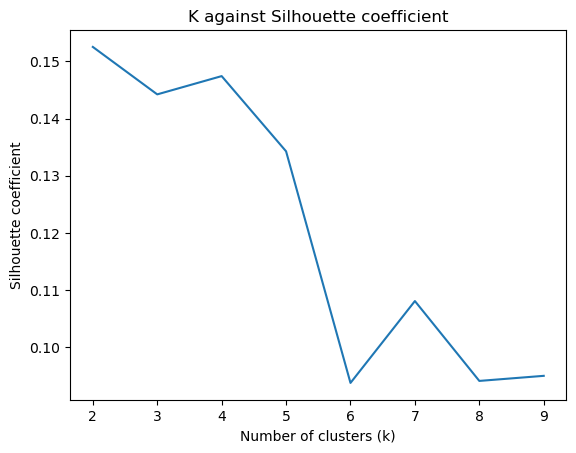

None
--------------------Question Five--------------------
--------------------Running the k-means ++ clustering algorithm--------------------

Assigning cluster representative to word using Kmean ++ Algorithm for K=3
   closest      label
0        2   elephant
1        2    leopard
2        2        dog
3        2        cat
4        2   aligator
5        2        ant
6        2     baboon
7        2       bear
8        2        bat
9        2  butterfly

--------------------Varying the value of k from 2 to 9 and computing the Silhouette coefficient--------------------

Varying the value of k from 2 to 9 and computing the Silhouette coefficient
[0.1525277616533619, 0.14845629870675836, 0.09957350269055323, 0.10225911761038965, 0.1405772673695082, 0.1306960708209872, 0.10459930620514239, 0.09740441225760271]

--------------------Plot showing k in the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot.--------------------


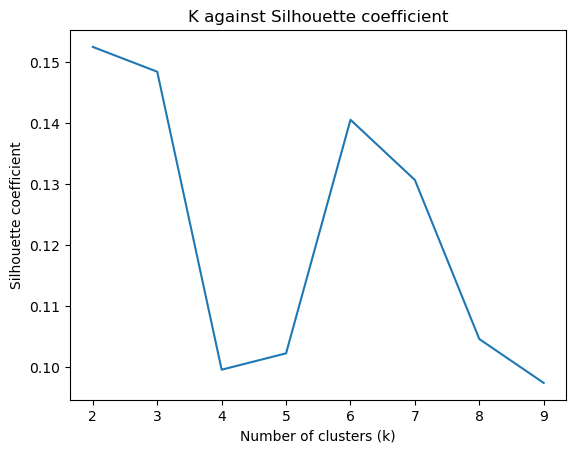

None
--------------------Question Six--------------------
--------------------Running the Bisecting k-means clustering algorithm--------------------

Assigning cluster representative to word using Bisecting Kmean Algorithm for K=3
   closest      label
0        1   elephant
1        1    leopard
2        1        dog
3        1        cat
4        1   aligator
5        1        ant
6        1     baboon
7        1       bear
8        1        bat
9        1  butterfly

--------------------Varying the value of k from 2 to 9 and computing the Silhouette coefficient--------------------



C:\Users\LENOVO\conda1\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\LENOVO\conda1\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Varying the value of k from 2 to 9 and computing the Silhouette coefficient
[0.1525277616533619, 0.14845629870675836, 0.09957350269055323, 0.10225911761038965, 0.1405772673695082, 0.1306960708209872, 0.10459930620514239, 0.09740441225760271]

--------------------Plot showing k in the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot.--------------------


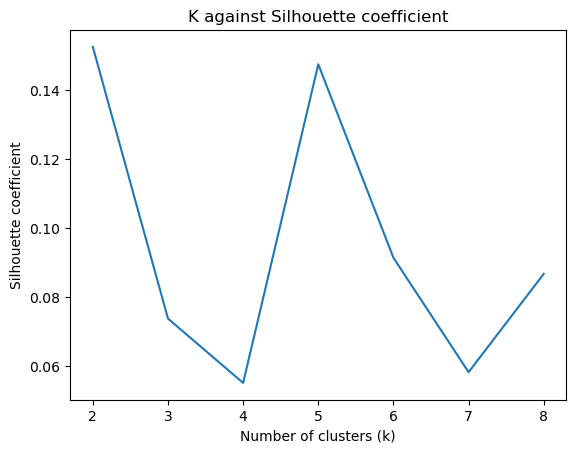

None
--------------------Question Seven--------------------

--------------------Plot Showing the silhouette score of the three Algorithms--------------------



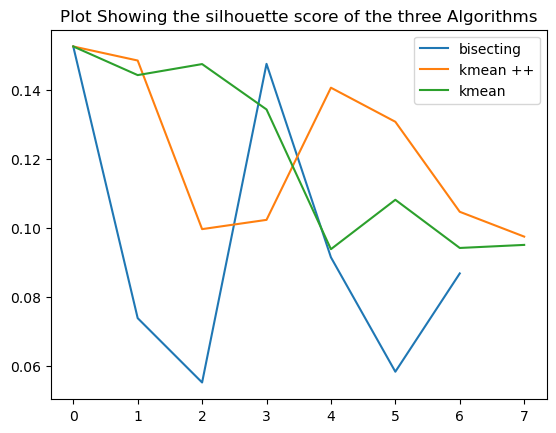

None
--------------------Combining the result of the clustering for the three algorithms--------------------

           kmean clusters  kmean ++ clusters  bisecting kmean clusters
label                                                                 
radicchio               0                  1                         2
rhubarb                 0                  1                         2
turnip                  0                  1                         2
radish                  0                  1                         2
courgette               0                  1                         2
pumpkin                 2                  1                         0
potato                  0                  1                         2
quandong                2                  1                         1
sunchokes               0                  1                         2
zucchini                0                  1                         2


In [7]:
print("--------------------Implementing Clustering Algorithms--------------------\n")

""" Importing Libraries """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math


"""Reading Dataset"""
def data_import(filepath):
    """
    Imports a dataset from a file and converts it to a NumPy array.

    Parameters:
    filepath (str): The path to the file containing the dataset.

    Returns:
    tuple: A tuple containing two NumPy arrays: the data (without the label column) and the label column.

    """

    # Create an empty list to hold the data
    data = []

    # Open the file and read each line
    with open(filepath) as f:
        for line in f:
            # Split the line into individual values
            values = line.strip().split()

            # Convert each value to a float (except the first one)
            values = [float(v) if i!=0 else v for i,v in enumerate(values)]

            # Add the values to the data list
            data.append(values)

    # Convert the data list to a pandas DataFrame
    data = pd.DataFrame(data)

    # Extract the label column and convert it to a NumPy array
    label = np.array(data.iloc[:, 0])

    # Drop the label column from the data and convert it to a NumPy array
    data = np.array(data.drop(columns=[0]))

    return data, label

"""Importing Data"""
filepath = 'dataset'
data, label = data_import(filepath)

"""Implement the k-means clustering algorithm following your explanation and the pseudo code"""
def kmeans(data, k, maxIter):
    """
    Applies the k-means algorithm to cluster a dataset.

    Parameters:
    data (ndarray): A 2D NumPy array containing the dataset to be clustered.
    k (int): The number of clusters to create.
    maxIter (int): The maximum number of iterations to perform.

    Returns:
    tuple: A tuple containing two NumPy arrays: the final cluster centers and the membership of each data point.

    Example:
    >>> centers, membership = kmeans(data, 3, 100)
    """

    # Initialize cluster centers
    n = data.shape[0]
    centeroid = data[np.random.choice(n, k, replace=False)]
    closest = np.zeros(n).astype(int)

    # Run k-means algorithm for maxIter iterations or until convergence
    for iteration in range(maxIter):
        old_closest = closest.copy()

        # Update cluster membership
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i] = ((data-centeroid[i])**2).sum(axis=1)
        closest = np.argmin(distances, axis=1)

        # Update cluster centers
        for i in range(k):
            centeroid[i, :] = data[closest == i].mean(axis=0)

        # Break if converged
        if all(closest == old_closest):
            break

    centeroid = np.array(centeroid)
    return centeroid, closest

"""Implement the k-means++ clustering algorithm following your explanation and the pseudo code"""
def kmeans_pp(data, k, maxIter):
    """
    Applies the k-means++ algorithm to cluster a dataset.

    Parameters:
    data (ndarray): A 2D NumPy array containing the dataset to be clustered.
    k (int): The number of clusters to create.
    maxIter (int): The maximum number of iterations to perform.

    Returns:
    tuple: A tuple containing two NumPy arrays: the final cluster centers and the membership of each data point.

    Example:
    >>> centers, membership = kmeans_pp(data, 3, 100)
    """

    # Initialize cluster centers using k-means++
    n = data.shape[0]
    centeroid = np.zeros((k, data.shape[1]))
    centeroid[0] = data[np.random.choice(n)]

    for i in range(1, k):
        # Compute distance to nearest center for each point
        distances = np.zeros(n)
        for j in range(n):
            distances[j] = np.min(np.sum((centeroid[:i] - data[j])**2, axis=1))

        # Choose next center with probability proportional to square distance
        prob = distances**2 / np.sum(distances**2)
        centeroid[i] = data[np.random.choice(n, p=prob)]

    # Run k-means algorithm for maxIter iterations or until convergence
    closest = np.zeros(n).astype(int)

    for iteration in range(maxIter):
        old_closest = closest.copy()

        # Update cluster membership
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i] = ((data-centeroid[i])**2).sum(axis=1)
        closest = np.argmin(distances, axis=1)

        # Update cluster centers
        for i in range(k):
            centeroid[i, :] = data[closest == i].mean(axis=0)

        # Break if converged
        if all(closest == old_closest):
            break

    centeroid = np.array(centeroid)
    return centeroid, closest


"""Implement the Bisecting k-Means algorithm following your explanation and the pseudo code."""
def bisecting_kmeans(data, k, maxIter):
    """
    Cluster data using the bisecting k-means algorithm.

    Parameters:
    -----------
    data : array-like, shape (n_samples, n_features)
        The data to cluster.
    k : int
        The number of clusters to form.
    maxIter : int
        The maximum number of iterations for each k-means run.

    Returns:
    --------
    centroid : array, shape (k, n_features)
        Coordinates of cluster centers.
    labels : array, shape (n_samples,)
        Index of the cluster each sample belongs to.
    """
    # Initialize with all data points in one cluster
    clusters = [data]
    centroid = [data.mean(axis=0)]
    closest = np.zeros(data.shape[0]).astype(int)

    # Bisect clusters k-1 times
    for i in range(k - 1):
        # Find the cluster with the largest SSE (sum of squared errors)
        max_sse = 0
        max_cluster_index = -1
        for j in range(len(clusters)):
            sse = ((clusters[j] - centroid[j])**2).sum()
            if sse > max_sse:
                max_sse = sse
                max_cluster_index = j

        # Bisect the largest cluster
        bisect_cluster = clusters.pop(max_cluster_index)
        bisect_centroid = centroid.pop(max_cluster_index)

        # Run k-means on the two resulting clusters
        for j in range(2):
            centeroid, closest = kmeans(bisect_cluster, 2, maxIter)
            cluster = [bisect_cluster[closest==j] for j in range(k)]
            clusters.append(cluster[j])
            centroid.append(centeroid[j])

    # Assign cluster labels to each data point
    labels = np.zeros(data.shape[0]).astype(int)
    for i in range(len(clusters)):
        labels[np.isin(data, clusters[i]).all(axis=1)] = i
    centroid = np.array(centroid)
    return centroid, labels

""" 
    Run the clustering algorithm you implemented in part (1) to cluster the given instances (dataset), 
    Vary the value of kfrom 1 to 9 and compute the Silhouette coefficient for each set of clusters and 
    Plot kin the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot. 
    We need to write few function to help us achieve this
    
"""
"""1. The Silhouette Coefficience Function"""
def silhouette_coef(data, maxIter, algorithm):
    """
    Calculates the Silhouette Coefficient for a range of cluster numbers (k) using the specified clustering algorithm.

    Args:
    - data: numpy array of shape (n_samples, n_features) containing the data to cluster
    - maxIter: maximum number of iterations for the clustering algorithm
    - algorithm: function implementing the clustering algorithm, e.g. kmeans or bisecting_kmeans

    Returns:
    - silhouette_scores: list of Silhouette Coefficients for each value of k, with k ranging from 2 to 9
    """
    silhouette_scores = []
    for k in range(2, 10):
        centers, labels = algorithm(data, k, maxIter)
        # calculate silhouette coefficient
        s = []
        for i in range(len(data)):
            a = np.mean([np.linalg.norm(data[i]-data[j]) for j in range(len(data)) if labels[j] == labels[i]])
            b = min([np.mean([np.linalg.norm(data[i]-data[j]) for j in range(len(data)) if labels[j] == c]) for c in range(k) if c != labels[i]])
            s.append((b-a)/max(a,b))
        silhouette_scores.append(np.mean(s))
    return silhouette_scores

"""2. The Silhouette Coefficience against K Function """
def silhouette_plot(silhouette_scores):
    """
    Plot the silhouette scores against the number of clusters for a given range of k.

    Args:
    - silhouette_scores: list of silhouette scores for different values of k.

    Returns:
    - None (plots a graph)
    """
    # plot silhouette scores for each k
    plt.plot(range(2, 10), silhouette_scores)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette coefficient')
    plt.title('K against Silhouette coefficient')
    plt.show()
    
"""3. Function to assign cluster representativeto the dataset label"""
def run_cluster(closest, label):
    """
    Returns a Pandas DataFrame with two columns: 'closest' and 'label'.
    
    Parameters:
        closest (numpy.ndarray): An array containing the closest centroid to each data point.
        label (numpy.ndarray): An array containing the label assigned to each data point.
        
    Returns:
        pandas.DataFrame: A DataFrame with two columns: 'closest' and 'label'.
    """
    data_dict = {'closest': closest, 'label': label}

    # create a dataframe from the dictionary
    df = pd.DataFrame(data_dict)
    return df


print("--------------------Question Four--------------------")
print("--------------------Running the k-means clustering algorithm--------------------\n")
centeroid, closest = kmeans(data, 3, 10)
kmean_instance = run_cluster(closest, label)
print(f"Assigning cluster representative to word using Kmean Algorithm for K=3\n{kmean_instance.head(10)}\n")

print("--------------------Varying the value of k from 2 to 9 and computing the Silhouette coefficient--------------------\n")
kmeans_silhouette_scores = silhouette_coef(data, 10000, kmeans)
print(f"Varying the value of k from 2 to 9 and computing the Silhouette coefficient\n{kmeans_silhouette_scores}\n")

print("--------------------Plot showing k in the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot.--------------------")
print(silhouette_plot(kmeans_silhouette_scores))


print("--------------------Question Five--------------------")
print("--------------------Running the k-means ++ clustering algorithm--------------------\n")
centeroid, closest = kmeans_pp(data, 3, 10)
kmean_pp_instance = run_cluster(closest, label)
print(f"Assigning cluster representative to word using Kmean ++ Algorithm for K=3\n{kmean_pp_instance.head(10)}\n")

print("--------------------Varying the value of k from 2 to 9 and computing the Silhouette coefficient--------------------\n")
kmeans_pp_silhouette_scores = silhouette_coef(data, 10000, kmeans_pp)
print(f"Varying the value of k from 2 to 9 and computing the Silhouette coefficient\n{kmeans_pp_silhouette_scores}\n")

print("--------------------Plot showing k in the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot.--------------------")
print(silhouette_plot(kmeans_pp_silhouette_scores))


print("--------------------Question Six--------------------")
print("--------------------Running the Bisecting k-means clustering algorithm--------------------\n")
centeroid, closest = bisecting_kmeans(data, 3, 10)
bisecting_kmeans_instance = run_cluster(closest, label)
print(f"Assigning cluster representative to word using Bisecting Kmean Algorithm for K=3\n{bisecting_kmeans_instance.head(10)}\n")

print("--------------------Varying the value of k from 2 to 9 and computing the Silhouette coefficient--------------------\n")
bisecting_kmeans_silhouette_scores = silhouette_coef(data, 10000, bisecting_kmeans)
print(f"Varying the value of k from 2 to 9 and computing the Silhouette coefficient\n{kmeans_pp_silhouette_scores}\n")

print("--------------------Plot showing k in the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot.--------------------")
print(silhouette_plot(bisecting_kmeans_silhouette_scores))


print("--------------------Question Seven--------------------\n")

""" 
    Comparing the different clusterings you obtained in (4)-(6).
    We need 2 function to implement the comparison
"""
"""1. The Silhouette Coefficience against K Function """
"""2. The Silhouette Coefficience against K Function """

def combined_plot(data, bisecting_kmeans_silhouette_scores, kmeans_pp_silhouette_scores, kmeans_silhouette_scores):
    """
    Plots a line graph of the silhouette scores for the bisecting k-means, k-means++, and k-means clustering algorithms.

    Args:
    - data (array-like): The input data to cluster.
    - bisecting_kmeans_silhouette_scores (list): The silhouette scores for bisecting k-means clustering.
    - kmeans_pp_silhouette_scores (list): The silhouette scores for k-means++ clustering.
    - kmeans_silhouette_scores (list): The silhouette scores for k-means clustering.

    Returns:
    - None: This function does not return anything, it simply plots the graph.
    """
    # create a dictionary with the three lists as values and column names as keys
    data = {'bisecting': bisecting_kmeans_silhouette_scores, 'kmean ++': kmeans_pp_silhouette_scores, 'kmean': kmeans_silhouette_scores}

    # create a DataFrame from the dictionary
    df = pd.DataFrame(data)

    # plot a line graph with three lines for each column
    plt.plot(df['bisecting'], label='bisecting')
    plt.plot(df['kmean ++'], label='kmean ++')
    plt.plot(df['kmean'], label='kmean')

    # add title and legend to the plot
    plt.title('Plot Showing the silhouette score of the three Algorithms')
    plt.legend()

    # show the plot
    plt.show()

def combined_result(kmean_instance, kmean_pp_instance, bisecting_kmeans_instance):
    """
    Combines the results of three clustering algorithms into one DataFrame.

    Args:
    - kmean_instance: a pandas DataFrame containing the label assigned by k-means clustering algorithm.
    - kmean_pp_instance: a pandas DataFrame containing the label assigned by k-means++ clustering algorithm.
    - bisecting_kmeans_instance: a pandas DataFrame containing the label assigned by bisecting k-means clustering algorithm.

    Returns:
    - A pandas DataFrame with the last 10 rows of the concatenated DataFrame of the input DataFrames. 
      It shows the number of clusters assigned by each algorithm for each data point.
    """
    # concatenate the three instances into a single DataFrame
    combined_df = pd.concat([kmean_instance, kmean_pp_instance, bisecting_kmeans_instance], axis=1)

    # select only the relevant columns and reorder them
    combined_df = combined_df.iloc[:, [0, 1, 2, 4]]

    # set the index to the label column
    combined_df = combined_df.set_index('label')

    # rename the cluster columns for clarity
    combined_df.columns.values[[0, 1, 2]] = ['kmean clusters', 'kmean ++ clusters', 'bisecting kmean clusters']

    # return the last 10 rows of the DataFrame
    return combined_df.tail(10)


print("--------------------Plot Showing the silhouette score of the three Algorithms--------------------\n")
print(combined_plot(data, bisecting_kmeans_silhouette_scores, kmeans_pp_silhouette_scores, kmeans_silhouette_scores))

print("--------------------Combining the result of the clustering for the three algorithms--------------------\n")
print(combined_result(kmean_instance, kmean_pp_instance, bisecting_kmeans_instance))